In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls


import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

import seaborn as sns
sns.set()

import plotly
import plotly.graph_objs as go#graph objects
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

%matplotlib inline
plt.style.use("Solarize_Light2")

In [2]:
# Read the data for champions league 2013 to 2020 
# Data Set(UEFA Champions league Player Statistics) - https://www.kaggle.com/datasets/sarangpurandare/uefa-champions-league-player-statistics 
df_champions_league = pd.read_csv('UEFA_CL_Player_stats.csv') 


del df_champions_league['Unnamed: 0']

# Sort the data in ascending order according to season year
df_champions_league.sort_values(["season year"],axis=0,ascending=[False],inplace=True) 

# Describe the dataset
df_champions_league.describe()

,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,...,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
count,4069.000000,5733.000000,4069.000000,4069.000000,5635.000000,5635.000000,4069.000000,4069.000000,4069.000000,4069.000000,...,2477.000000,5412.000000,4069.000000,4069.000000,4069.000000,4069.000000,1190.000000,5733.00000,1566.000000,1566.000000
mean,6.724582,0.504622,0.515606,0.402310,0.321739,0.810470,135.311870,27.785942,163.097813,79.499521,...,179.978990,0.019401,0.022364,0.267142,73.876137,94.727943,0.397479,4.62899,0.971264,0.971264
std,0.896538,1.207323,1.079470,1.030319,0.743411,1.652205,133.109941,23.802069,150.727380,13.667264,...,223.656219,0.137944,0.190071,1.309204,77.196928,92.834312,0.776545,2.76845,1.395499,1.416856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,6.575000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,9.000000,51.000000,75.244300,...,0.000000,0.000000,0.000000,0.000000,18.000000,28.000000,0.000000,2.00000,0.000000,0.000000
50%,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,22.000000,125.000000,82.089552,...,105.500000,0.000000,0.000000,0.000000,50.000000,69.000000,0.000000,4.00000,0.000000,0.000000
75%,7.033333,1.000000,1.000000,0.000000,0.000000,1.000000,188.000000,40.000000,229.000000,87.500000,...,295.000000,0.000000,0.000000,0.000000,103.000000,129.000000,1.000000,6.00000,1.000000,1.000000
max,9.700000,17.000000,11.000000,12.000000,8.000000,20.000000,906.000000,186.000000,980.000000,100.000000,...,1092.000000,1.000000,4.000000,17.000000,532.000000,687.000000,8.000000,13.00000,9.000000,9.000000


In [3]:
# datasets has 5733 rows and 108 columns
df_champions_league.shape 

(5733, 108)

In [4]:
# Print a summary of the dataframe
df_champions_league.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 5732 to 2866
Columns: 108 entries, name to substitutionsOut
dtypes: float64(101), int64(3), object(4)
memory usage: 4.8+ MB


In [5]:
df_champions_league.corr()

,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,...,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
rating,1.000000,0.224198,0.231908,0.132765,0.215477,0.258699,0.278993,0.272405,0.289400,0.337478,...,0.185978,0.000022,0.030336,0.047835,0.230286,0.296379,0.292643,0.281987,NaN,NaN
goals,0.224198,1.000000,0.473131,0.616096,0.402078,0.911194,0.172491,0.245804,0.191146,0.005401,...,0.186147,-0.012083,-0.047830,-0.082946,0.006971,0.329498,0.549559,0.400149,0.031305,0.393964
bigChancesCreated,0.231908,0.473131,1.000000,0.397609,0.726911,0.670621,0.332265,0.358558,0.350051,0.064349,...,0.249568,0.005636,-0.055017,-0.093835,0.126353,0.517477,0.527677,0.422935,NaN,NaN
bigChancesMissed,0.132765,0.616096,0.397609,1.000000,0.350697,0.600307,0.117056,0.177866,0.131462,-0.001947,...,0.162071,-0.014496,-0.045955,-0.079695,-0.022732,0.247210,0.338240,0.339568,NaN,NaN
assists,0.215477,0.402078,0.726911,0.350697,1.000000,0.743580,0.317777,0.354935,0.336684,0.056456,...,0.250693,0.001601,-0.049279,-0.085186,0.128159,0.492361,0.486174,0.413356,0.028732,0.350713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
totalOppositionHalfPasses,0.296379,0.329498,0.517477,0.247210,0.492361,0.460678,0.896887,0.762976,0.912541,0.214017,...,0.555129,0.030341,-0.018588,-0.045901,0.657046,1.000000,0.638271,0.767017,NaN,NaN
totwAppearances,0.292643,0.549559,0.527677,0.338240,0.486174,0.600890,0.570233,0.617548,0.597972,0.030483,...,0.495735,0.047831,0.094293,0.102909,0.441973,0.638271,1.000000,0.652751,NaN,NaN
appearances,0.281987,0.400149,0.422935,0.339568,0.413356,0.478292,0.736906,0.787088,0.775067,0.115991,...,0.592361,0.029952,0.100295,0.152837,0.644540,0.767017,0.652751,1.000000,0.161218,0.474301
substitutionsIn,NaN,0.031305,NaN,NaN,0.028732,0.036464,NaN,NaN,NaN,NaN,...,-0.214001,-0.026970,NaN,NaN,NaN,NaN,NaN,0.161218,1.000000,0.085222


In [6]:
df_champions_league.head()

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,20/21,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,2,NaN,NaN
2758,Damien Da Silva,UEFA Champions League 20/21,20/21,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,115.0,56.0,0.0,3,NaN,NaN
562,Ashley Young,UEFA Champions League 20/21,20/21,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,41.0,0.0,2,NaN,NaN
2767,Gergő Lovrencsics,UEFA Champions League 20/21,20/21,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,38.0,0.0,3,NaN,NaN
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,20/21,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN


## Data Cleaning - Missing Entries

In [7]:
# Check for missing entries
df_champions_league.isna().sum()

name                            0
season                          0
season year                     0
team                            0
rating                       1664
                             ... 
totalOppositionHalfPasses    1664
totwAppearances              4543
appearances                     0
substitutionsIn              4167
substitutionsOut             4167
Length: 108, dtype: int64

In [8]:
#Check for the right value of mean for replacement
print((df_champions_league.mean()))

rating                        6.724582
goals                         0.504622
bigChancesCreated             0.515606
bigChancesMissed              0.402310
assists                       0.321739
                               ...    
totalOppositionHalfPasses    94.727943
totwAppearances               0.397479
appearances                   4.628990
substitutionsIn               0.971264
substitutionsOut              0.971264
Length: 104, dtype: float64


In [9]:
df_champions_league = df_champions_league.fillna(df_champions_league.mean())
df_champions_league.head()

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,20/21,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264
2758,Damien Da Silva,UEFA Champions League 20/21,20/21,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264
562,Ashley Young,UEFA Champions League 20/21,20/21,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264
2767,Gergő Lovrencsics,UEFA Champions League 20/21,20/21,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,20/21,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264


In [10]:
df_champions_league.isna().sum()

name                         0
season                       0
season year                  0
team                         0
rating                       0
                            ..
totalOppositionHalfPasses    0
totwAppearances              0
appearances                  0
substitutionsIn              0
substitutionsOut             0
Length: 108, dtype: int64

## Convert to Month and Year for Season

In [11]:
# Converting to Month and Year for Season.
df_champions_league['season year'] = pd.to_datetime(df_champions_league['season year'], format='%d/%y')

print (df_champions_league)
print (df_champions_league.dtypes)


                           name                       season season year  \
5732     Sabua Leon Rustamovich  UEFA Champions League 20/21  2021-01-20   
2758            Damien Da Silva  UEFA Champions League 20/21  2021-01-20   
562                Ashley Young  UEFA Champions League 20/21  2021-01-20   
2767          Gergő Lovrencsics  UEFA Champions League 20/21  2021-01-20   
4044     El Arbi Hillel Soudani  UEFA Champions League 20/21  2021-01-20   
...                         ...                          ...         ...   
2420           Steven Mouyokolo       Champions League 13/14  2014-01-13   
2414                 Joël Matip       Champions League 13/14  2014-01-13   
2410  Pierre-Emerick Aubameyang       Champions League 13/14  2014-01-13   
2408                Bakary Koné       Champions League 13/14  2014-01-13   
2866                Kevin Kampl       Champions League 13/14  2014-01-13   

                    team    rating  goals  bigChancesCreated  \
5732        fc-krasnoda

In [12]:
df_champions_league['season year'] = pd.to_datetime(df_champions_league['season year'], format='%Y%m')

print (df_champions_league)
print (df_champions_league.dtypes)

                           name                       season season year  \
5732     Sabua Leon Rustamovich  UEFA Champions League 20/21  2021-01-20   
2758            Damien Da Silva  UEFA Champions League 20/21  2021-01-20   
562                Ashley Young  UEFA Champions League 20/21  2021-01-20   
2767          Gergő Lovrencsics  UEFA Champions League 20/21  2021-01-20   
4044     El Arbi Hillel Soudani  UEFA Champions League 20/21  2021-01-20   
...                         ...                          ...         ...   
2420           Steven Mouyokolo       Champions League 13/14  2014-01-13   
2414                 Joël Matip       Champions League 13/14  2014-01-13   
2410  Pierre-Emerick Aubameyang       Champions League 13/14  2014-01-13   
2408                Bakary Koné       Champions League 13/14  2014-01-13   
2866                Kevin Kampl       Champions League 13/14  2014-01-13   

                    team    rating  goals  bigChancesCreated  \
5732        fc-krasnoda

In [13]:
#Check the dataframe for change format in Date of Sale
df_champions_league.head()

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264
2758,Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264
562,Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264
2767,Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264


In [14]:
# Perform inserting Year into dataframe
df_champions_league['Year'] = df_champions_league['season year'].dt.year
df_champions_league.head()

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264,2021
2758,Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264,2021
562,Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264,2021
2767,Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264,2021
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264,2021


In [15]:
# Performing inserting Month into dataframe
df_champions_league['Month'] = df_champions_league['season year'].dt.month
#df_mth = df_singapore_condo_apt_data.head()
#df_mth
df_champions_league

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,4.000000,1.000000,0.000000,2,0.971264,0.971264,2021,1
2758,Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,115.000000,56.000000,0.000000,3,0.971264,0.971264,2021,1
562,Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,32.000000,41.000000,0.000000,2,0.971264,0.971264,2021,1
2767,Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,71.000000,38.000000,0.000000,3,0.971264,0.971264,2021,1
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.971264,0.971264,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Steven Mouyokolo,Champions League 13/14,2014-01-13,celtic,6.724582,0,0.515606,0.40231,0.000000,0.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,1,0.000000,0.000000,2014,1
2414,Joël Matip,Champions League 13/14,2014-01-13,liverpool,6.724582,1,0.515606,0.40231,0.321739,0.81047,...,0.022364,0.267142,73.876137,94.727943,0.397479,6,0.971264,0.971264,2014,1
2410,Pierre-Emerick Aubameyang,Champions League 13/14,2014-01-13,borussia-dortmund,6.724582,1,0.515606,0.40231,0.000000,1.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,9,6.000000,2.000000,2014,1
2408,Bakary Koné,Champions League 13/14,2014-01-13,olympique-lyonnais,6.724582,0,0.515606,0.40231,0.000000,0.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,3,1.000000,0.000000,2014,1


In [16]:
df_champions_league.shape

(5733, 110)

## Checking for Outliers

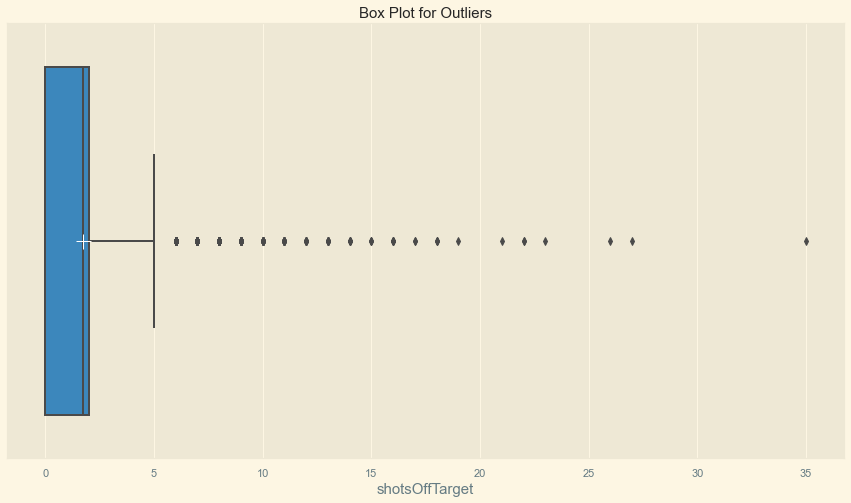

In [17]:
# box plot to check the presence of outliers
plt.figure(figsize = (15,8))

sns.boxplot(x = df_champions_league['shotsOffTarget'], showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "white",
                       "markersize": "15"})

plt.title('Box Plot for Outliers', fontsize = 15)
plt.xlabel('shotsOffTarget', fontsize = 15)
plt.savefig("C:/Users/raufy/Downloads/shotsOffTarget.jpg")


## Setting index 

In [18]:
# Setting index to 'name'
df_champions_league.set_index('name')

,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
name,,,,,,,,,,,,,,,,,,,,,
Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.000000,0.00000,0.000000,0.00000,5.00000,...,0.000000,0.000000,4.000000,1.000000,0.000000,2,0.971264,0.971264,2021,1
Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.000000,0.00000,0.000000,0.00000,151.00000,...,0.000000,0.000000,115.000000,56.000000,0.000000,3,0.971264,0.971264,2021,1
Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.000000,0.00000,0.000000,0.00000,52.00000,...,0.000000,0.000000,32.000000,41.000000,0.000000,2,0.971264,0.971264,2021,1
Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.000000,0.00000,0.000000,0.00000,77.00000,...,0.000000,0.000000,71.000000,38.000000,0.000000,3,0.971264,0.971264,2021,1
El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.971264,0.971264,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Steven Mouyokolo,Champions League 13/14,2014-01-13,celtic,6.724582,0,0.515606,0.40231,0.000000,0.00000,135.31187,...,0.022364,0.267142,73.876137,94.727943,0.397479,1,0.000000,0.000000,2014,1
Joël Matip,Champions League 13/14,2014-01-13,liverpool,6.724582,1,0.515606,0.40231,0.321739,0.81047,135.31187,...,0.022364,0.267142,73.876137,94.727943,0.397479,6,0.971264,0.971264,2014,1
Pierre-Emerick Aubameyang,Champions League 13/14,2014-01-13,borussia-dortmund,6.724582,1,0.515606,0.40231,0.000000,1.00000,135.31187,...,0.022364,0.267142,73.876137,94.727943,0.397479,9,6.000000,2.000000,2014,1


## Data visualization

### Creating Parallel Coordinates Plots for Data Analysis

In [19]:
import plotly.express as px
import pandas as pd
df_champions_league

fig = px.parallel_coordinates(
    df_champions_league,
    dimensions=[
        'Year','appearances', 'goals','assists','saves', 'tackles',
    ],
    color='Year',
    title ="Champions League Statistics 2013 to 2020",
        color_continuous_scale=px.colors.sequential.Emrld)
fig.show()

### Data Visualization for Players Rating(Plotly)

In [20]:
# Plotly to analyze data
trace0_1_overall = go.Box(y = df_champions_league['rating'], 
                name = 'Rating',
               marker_color = 'lightseagreen')

In [21]:
data = [trace0_1_overall]

offline.iplot(data)

## Goalkeeping Positions

### Saves

In [22]:
df_unit_v_no = df_champions_league.groupby(['team','name','appearances'])['saves'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["saves"],axis=0,ascending=[False]).reset_index()
df_saves = df_sort.head(20)
df_saves

,index,team,name,appearances,saves
0,2102,galatasaray,Fernando Muslera,6,87.062669
1,1486,cska-moscow,Igor Akinfeev,6,77.000000
2,2032,fk-crvena-zvezda,Milan Borjan,6,72.000000
3,897,bayern-munchen,Manuel Neuer,11,65.000000
4,3701,paris-saint-germain,Keylor Navas,11,59.000000
5,2388,inter,Samir Handanovič,6,53.000000
6,587,barcelona,Marc-André ter Stegen,9,49.000000
7,2742,liverpool,Alisson,12,46.000000
8,2743,liverpool,Alisson,13,46.000000
9,1100,borussia-dortmund,Roman Bürki,8,44.000000


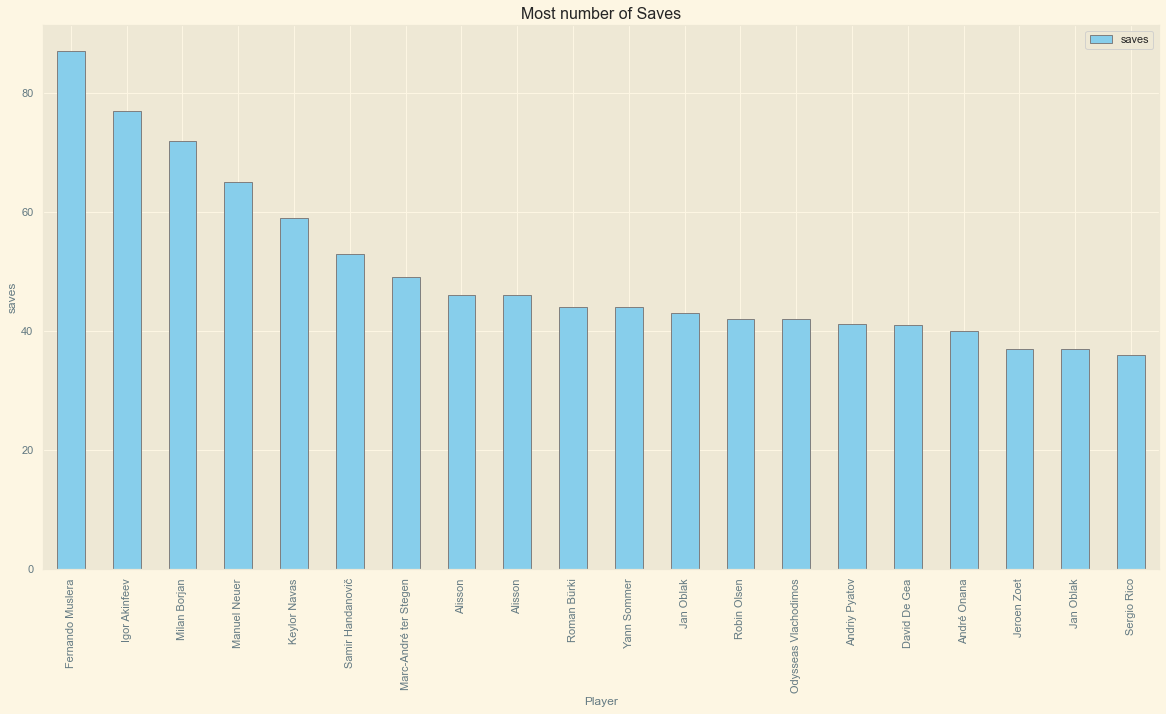

In [23]:
# Most number of Saves
df_saves.plot(kind='bar', x= 'name', y = 'saves', color = "skyblue", ec="grey", figsize=(20,10), rot =90, title= "Most number of Saves")
plt.xlabel('Player')
plt.ylabel('saves')
plt.show()

### Most Clean Sheet

In [24]:
df_unit_v_no = df_champions_league.groupby(['team','name',])['cleanSheet'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["cleanSheet"],axis=0,ascending=[False]).reset_index()
df_cleanSheet = df_sort.head(20)
df_cleanSheet

,index,team,name,cleanSheet
0,262,atletico-madrid,Jan Oblak,25.71246
1,326,barcelona,Marc-André ter Stegen,20.71246
2,2101,paris-saint-germain,Keylor Navas,19.71246
3,1406,juventus,Leonardo Bonucci,19.42492
4,1392,juventus,Cristiano Ronaldo,19.42492
5,470,bayern-munchen,Manuel Neuer,19.42492
6,322,barcelona,Lionel Messi,18.42492
7,2107,paris-saint-germain,Marquinhos,18.42492
8,1363,inter,Diego Godín,18.42492
9,301,barcelona,Antoine Griezmann,17.71246


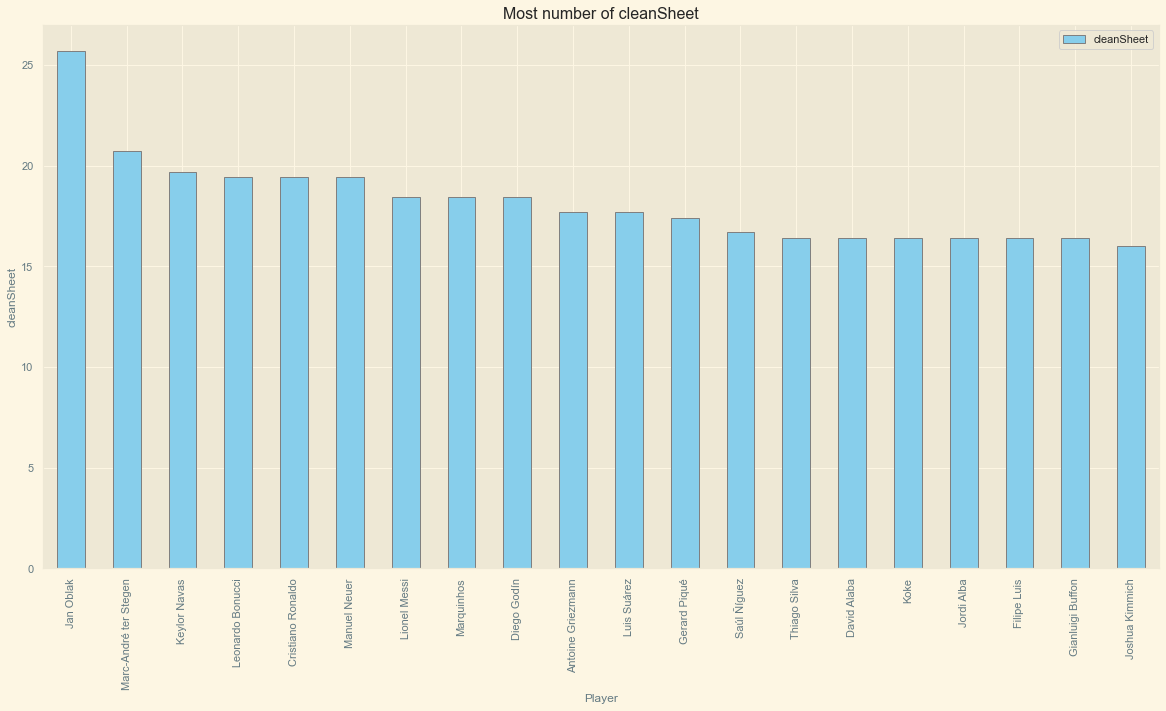

In [25]:
# Most number of cleanSheet
df_cleanSheet.plot(kind='bar', x= 'name', y = 'cleanSheet', color = "skyblue", ec="grey", figsize=(20,10), rot =90, title= "Most number of cleanSheet")
plt.xlabel('Player')
plt.ylabel('cleanSheet')
plt.show()

### Penalty Save

In [26]:
df_unit_v_no = df_champions_league.groupby(['team','name'])['penaltySave'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["penaltySave"],axis=0,ascending=[False]).reset_index()
df_penaltySave = df_sort.head(20)
df_penaltySave

,index,team,name,penaltySave
0,2400,shakhtar-donetsk,Andriy Pyatov,3.021627
1,326,barcelona,Marc-André ter Stegen,3.010813
2,1745,manchester-city,Ederson,3.000000
3,1755,manchester-city,Joe Hart,2.021627
4,470,bayern-munchen,Manuel Neuer,2.021627
5,262,atletico-madrid,Jan Oblak,2.010813
6,1434,juventus,Wojciech Szczęsny,2.000000
7,1522,leicester-city,Kasper Schmeichel,2.000000
8,685,chelsea,Willy Caballero,2.000000
9,2665,tottenham,Hugo Lloris,2.000000


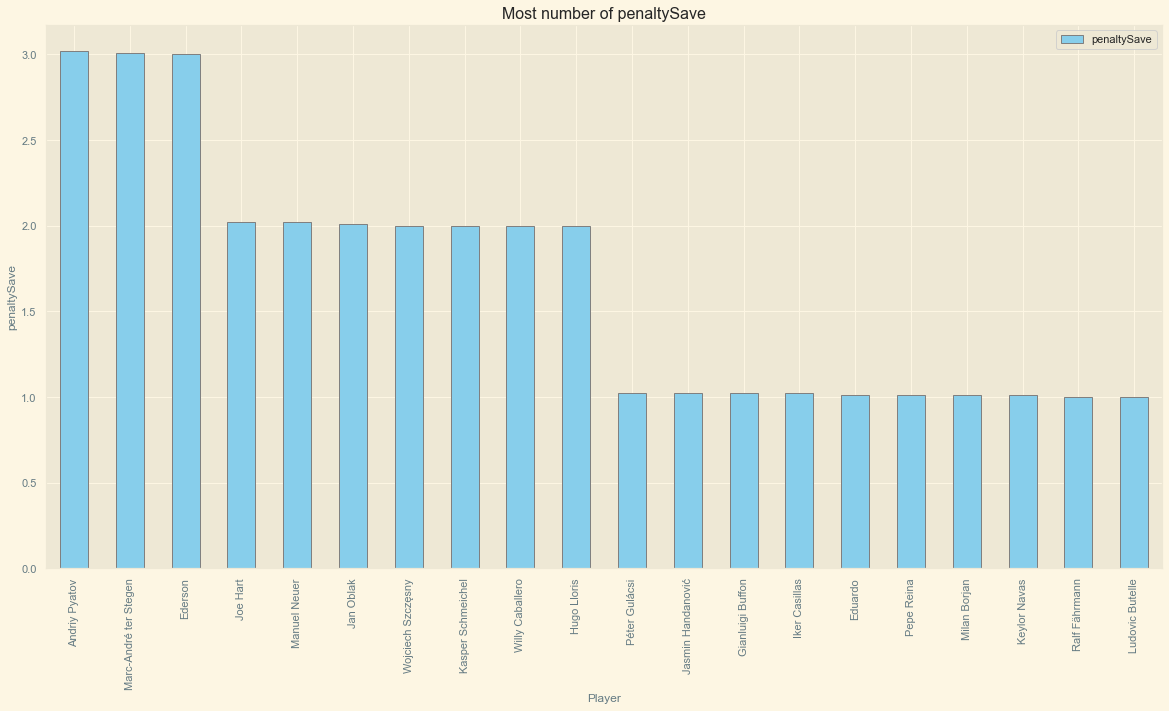

In [27]:
# Most number of penaltySave
df_penaltySave.plot(kind='bar', x= 'name', y = 'penaltySave', color = "skyblue", ec="grey", figsize=(20,10), rot =90, title= "Most number of penaltySave")
plt.xlabel('Player')
plt.ylabel('penaltySave')
plt.show()

## Defending Positions

### Interceptions

In [28]:
df_unit_v_no = df_champions_league.groupby(['team','name', 'appearances'])['interceptions'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["interceptions"],axis=0,ascending=[False]).reset_index()
df_int = df_sort.head(20)
df_int

,index,team,name,appearances,interceptions
0,4013,real-madrid,Marcelo,11,61.601376
1,3046,manchester-city,Fernandinho,8,52.601376
2,2857,lokomotiv-moscow,Grzegorz Krychowiak,6,50.000000
3,4040,real-madrid,Sergio Ramos,11,47.601376
4,4008,real-madrid,Luka Modrić,11,46.601376
5,554,barcelona,Javier Mascherano,8,46.000000
6,1286,chelsea,César Azpilicueta,8,46.000000
7,1251,celtic,Scott Brown,6,42.000000
8,4806,valencia,Francis Coquelin,6,42.000000
9,383,atletico-madrid,Filipe Luis,10,41.601376


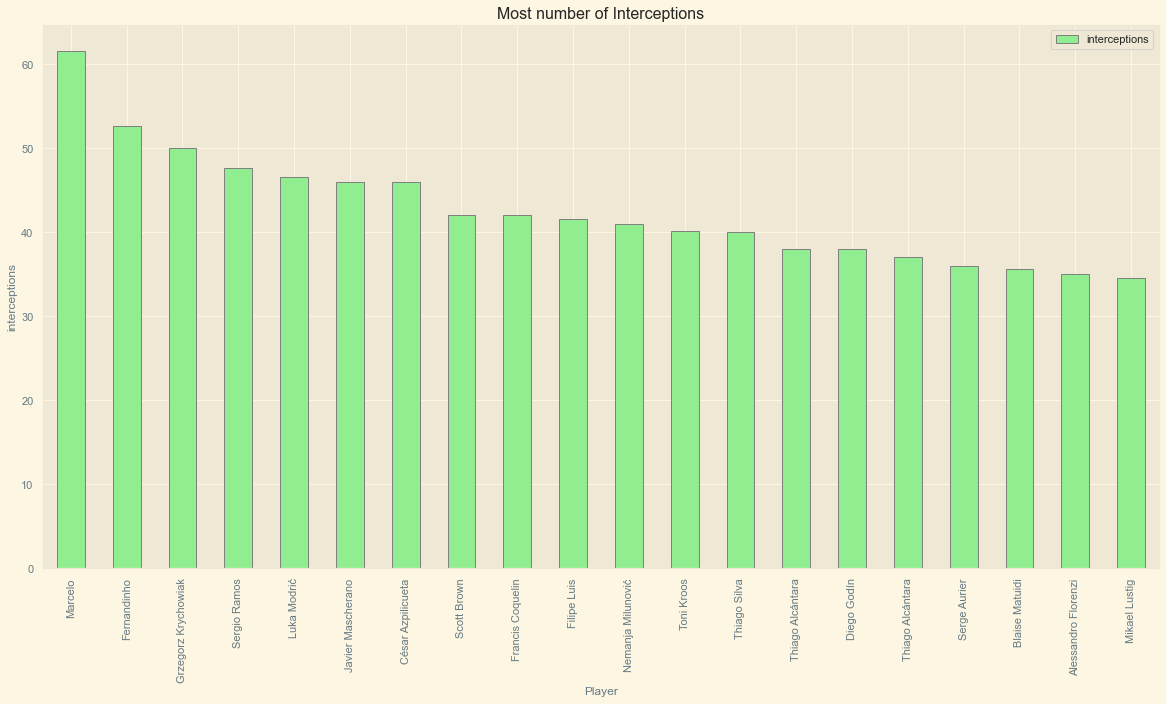

In [29]:
# Most number of Interceptions
df_int.plot(kind='bar', x= 'name', y = 'interceptions', color = "lightgreen", ec="grey", figsize=(20,10), rot =90, title= "Most number of Interceptions")
plt.xlabel('Player')
plt.ylabel('interceptions')
plt.show()

### Blocked Shots

In [30]:
df_unit_v_no = df_champions_league.groupby(['team','name', 'appearances'])['blockedShots'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["blockedShots"],axis=0,ascending=[False]).reset_index()
df_blockedShots = df_sort.head(20)
df_blockedShots

,index,team,name,appearances,blockedShots
0,4040,real-madrid,Sergio Ramos,11,20.993856
1,2039,fk-crvena-zvezda,Nemanja Milunović,6,18.000000
2,3164,manchester-united,Chris Smalling,8,18.000000
3,375,atletico-madrid,Felipe,8,17.000000
4,537,barcelona,Clément Lenglet,9,16.000000
5,3308,napoli,Konstantinos Manolas,8,14.000000
6,3722,paris-saint-germain,Marquinhos,8,13.993856
7,4032,real-madrid,Raphaël Varane,11,13.000000
8,1833,fc-porto,Pepe,6,12.993856
9,3046,manchester-city,Fernandinho,8,12.993856


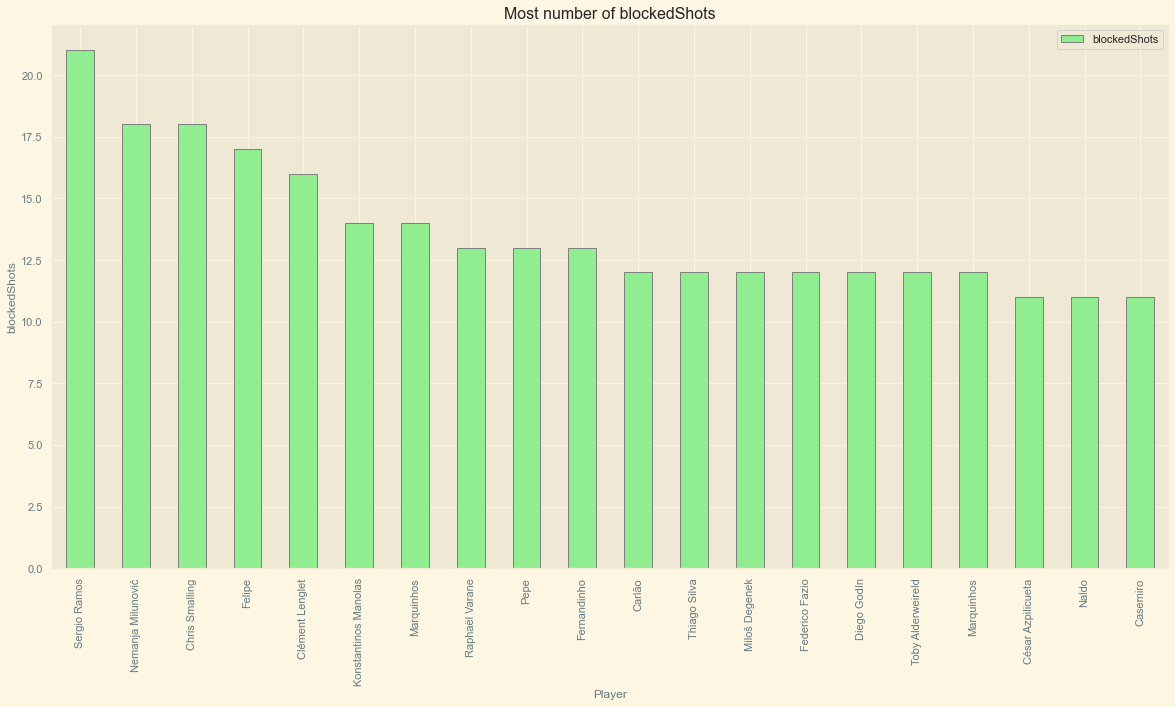

In [31]:
# Most number of tackles
df_blockedShots.plot(kind='bar', x= 'name', y = 'blockedShots', color = "lightgreen", ec="grey", figsize=(20,10), rot =90, title= "Most number of blockedShots")
plt.xlabel('Player')
plt.ylabel('blockedShots')
plt.show()

### Aerial Duels Won

In [32]:
df_unit_v_no = df_champions_league.groupby(['team','name', 'appearances'])['aerialDuelsWon'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["aerialDuelsWon"],axis=0,ascending=[False]).reset_index()
df_AerialDuelsWon = df_sort.head(20)
df_AerialDuelsWon

,index,team,name,appearances,aerialDuelsWon
0,4248,sevilla,Luuk de Jong,6,82.000000
1,4597,sporting-cp,Bas Dost,6,71.000000
2,4667,stade-rennais,Steven​ N'Zonzi,8,64.000000
3,4040,real-madrid,Sergio Ramos,11,59.504792
4,2857,lokomotiv-moscow,Grzegorz Krychowiak,6,57.000000
5,1068,borussia-dortmund,Mats Hummels,9,55.000000
6,4247,sevilla,Luuk de Jong,5,55.000000
7,375,atletico-madrid,Felipe,8,54.000000
8,3046,manchester-city,Fernandinho,8,52.504792
9,376,atletico-madrid,Felipe,10,49.000000


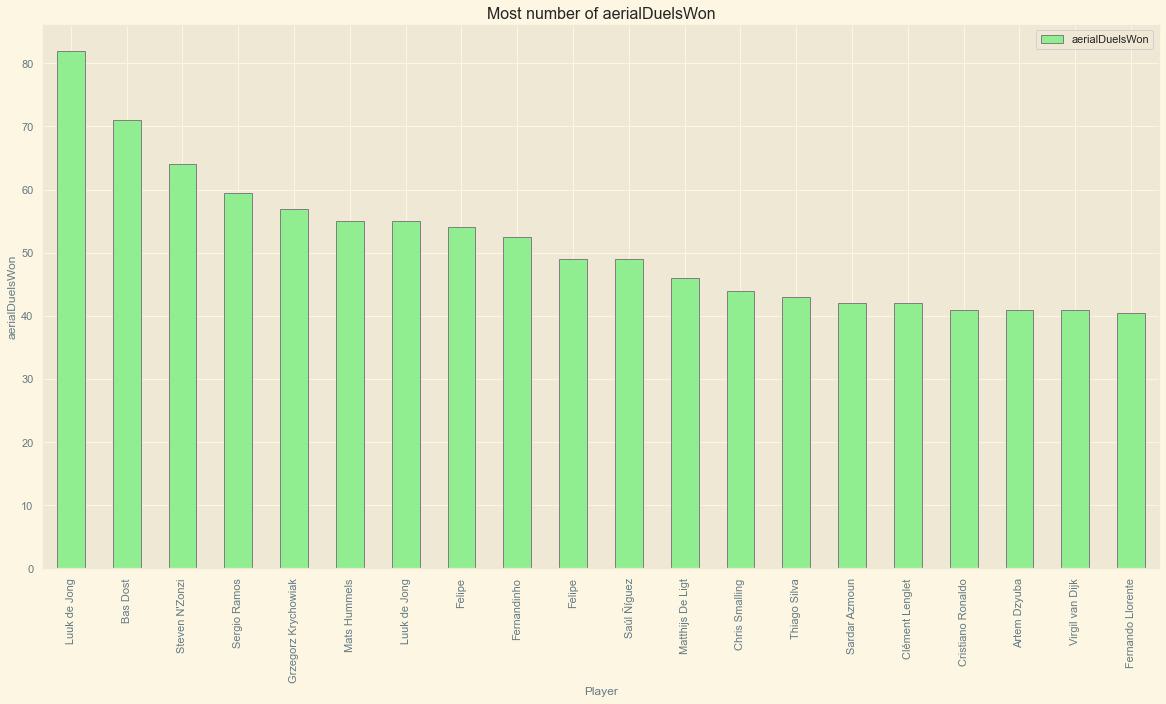

In [33]:
# Most number of Aerial Duels Won
df_AerialDuelsWon.plot(kind='bar', x= 'name', y = 'aerialDuelsWon', color = "lightgreen", ec="grey", figsize=(20,10), rot =90, title= "Most number of aerialDuelsWon")
plt.xlabel('Player')
plt.ylabel('aerialDuelsWon')
plt.show()

## Midfield Positions

### Accurate Crosses

In [34]:
df_unit_v_no = df_champions_league.groupby(['team','name','appearances'])['accurateCrosses'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["accurateCrosses"],axis=0,ascending=[False]).reset_index()
df_accurateCrosses = df_sort.head(20)
df_accurateCrosses


,index,team,name,appearances,accurateCrosses
0,4051,real-madrid,Toni Kroos,12,58.544114
1,869,bayern-munchen,Joshua Kimmich,11,38.000000
2,3147,manchester-united,Alex Telles,7,35.000000
3,4013,real-madrid,Marcelo,11,32.272057
4,3736,paris-saint-germain,Neymar,9,30.000000
5,4483,sl-benfica,Pizzi,6,29.000000
6,3148,manchester-united,Alex Telles,10,28.000000
7,2317,inter,Aleksandar Kolarov,12,25.000000
8,1679,fc-kobenhavn,Ludwig Augustinsson,6,25.000000
9,3663,paris-saint-germain,Dani Alves,8,24.272057


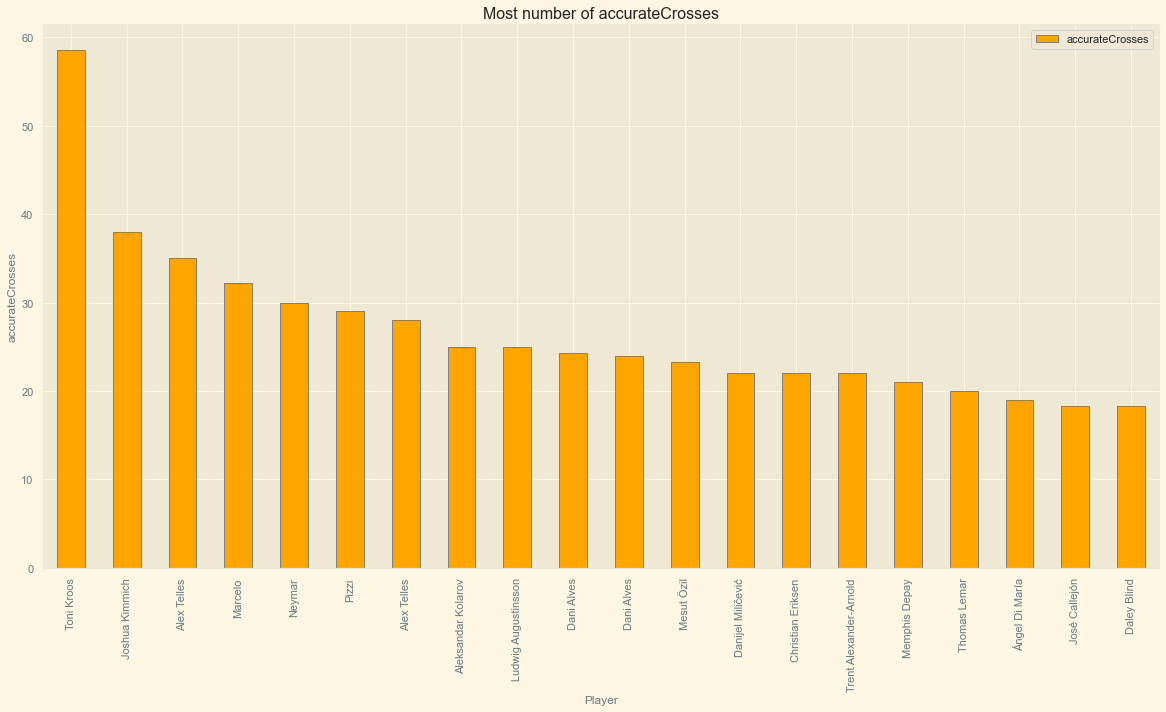

In [35]:
# Most number of accurateCrosses
df_accurateCrosses.plot(kind='bar', x= 'name', y = 'accurateCrosses', color = "orange", ec="grey", figsize=(20,10), rot =90, title= "Most number of accurateCrosses")
plt.xlabel('Player')
plt.ylabel('accurateCrosses')
plt.show()

### Key Passes

In [36]:
df_unit_v_no = df_champions_league.groupby(['team','name','appearances'])['keyPasses'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["keyPasses"],axis=0,ascending=[False]).reset_index()
df_keyPasses = df_sort.head(20)
df_keyPasses


,index,team,name,appearances,keyPasses
0,4051,real-madrid,Toni Kroos,12,95.547063
1,3736,paris-saint-germain,Neymar,9,62.000000
2,4013,real-madrid,Marcelo,11,60.273532
3,869,bayern-munchen,Joshua Kimmich,11,55.000000
4,3982,real-madrid,Isco,11,47.273532
5,576,barcelona,Lionel Messi,10,45.000000
6,921,bayern-munchen,Thiago Alcántara,9,43.000000
7,926,bayern-munchen,Thomas Müller,10,42.273532
8,3735,paris-saint-germain,Neymar,7,42.000000
9,4483,sl-benfica,Pizzi,6,41.000000


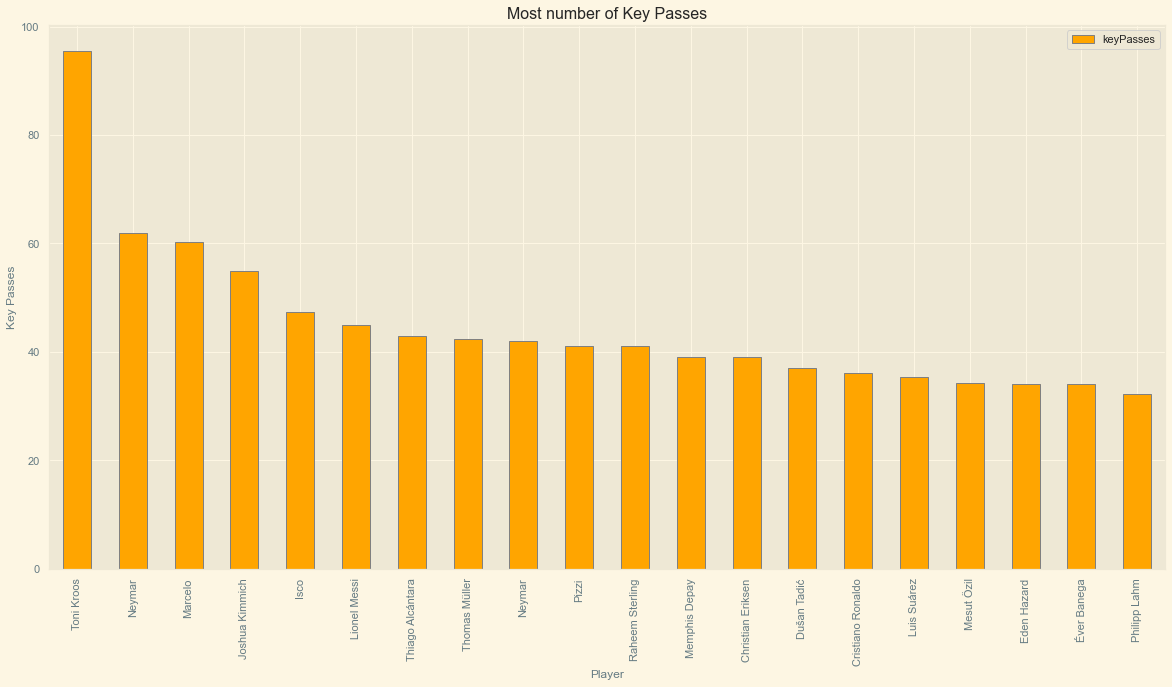

In [37]:
# Most number of Key Passes
df_keyPasses.plot(kind='bar', x= 'name' , y = 'keyPasses', color = "orange", ec="grey", figsize=(20,10), rot =90, title= "Most number of Key Passes")
plt.xlabel('Player')
plt.ylabel('Key Passes')
plt.show()

### Touches

In [38]:
df_unit_v_no = df_champions_league.groupby(['team','name','appearances'])['touches'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["touches"],axis=0,ascending=[False]).reset_index()
df_touches = df_sort.head(20)
df_touches

,index,team,name,appearances,touches
0,3046,manchester-city,Fernandinho,8,2115.300219
1,4051,real-madrid,Toni Kroos,12,1870.200877
2,869,bayern-munchen,Joshua Kimmich,11,1807.000000
3,993,borussia-dortmund,Axel Witsel,7,1740.600438
4,922,bayern-munchen,Thiago Alcántara,10,1668.000000
5,3716,paris-saint-germain,Marco Verratti,7,1645.300219
6,4013,real-madrid,Marcelo,11,1594.900657
7,576,barcelona,Lionel Messi,10,1548.000000
8,4667,stade-rennais,Steven​ N'Zonzi,8,1433.300219
9,3094,manchester-city,Nicolás Otamendi,8,1404.000000


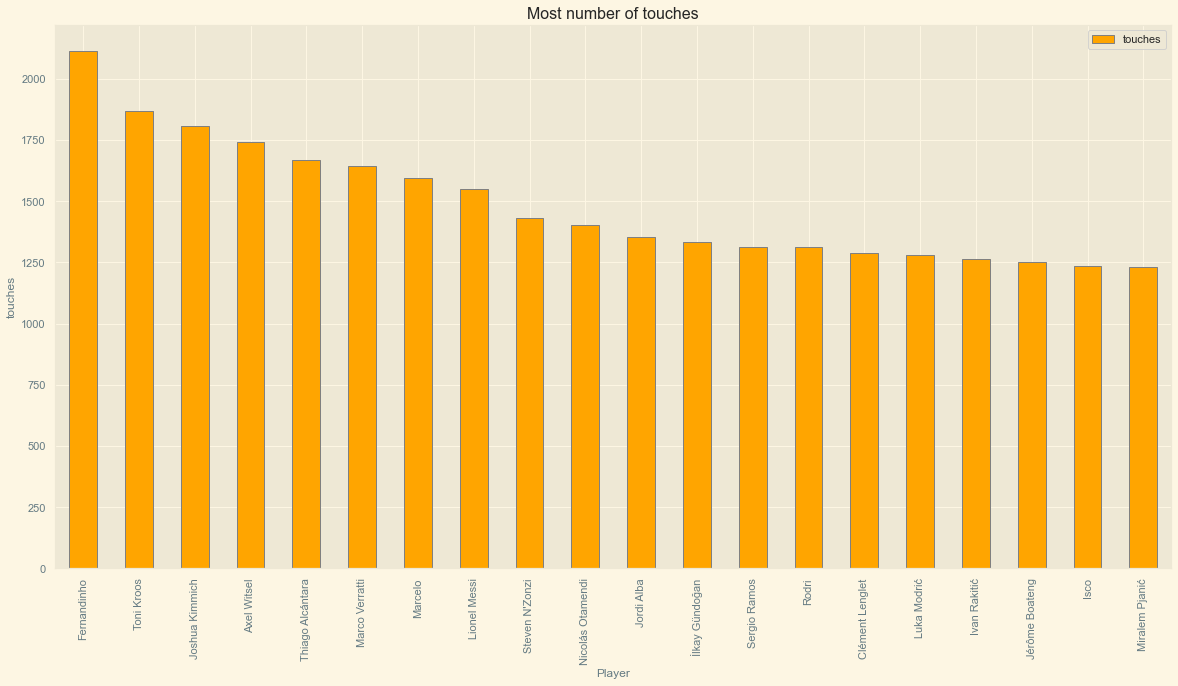

In [39]:
# Most number of touches
df_touches.plot(kind='bar', x= 'name', y = 'touches', color = "orange", ec="grey", figsize=(20,10), rot =90, title= "Most number of touches")
plt.xlabel('Player')
plt.ylabel('touches')
plt.show()

## Attacking Positions

### Shots On Target

In [40]:
df_unit_v_no = df_champions_league.groupby(['team','name'])['shotsOnTarget'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["shotsOnTarget"],axis=0,ascending=[False]).reset_index()
df_top_20 = df_sort.head(20)
df_top_20

,index,team,name,shotsOnTarget
0,1392,juventus,Cristiano Ronaldo,133.127058
1,475,bayern-munchen,Robert Lewandowski,114.127058
2,322,barcelona,Lionel Messi,107.127058
3,2239,real-madrid,Karim Benzema,74.127058
4,2112,paris-saint-germain,Neymar,65.127058
5,272,atletico-madrid,Luis Suárez,63.563529
6,301,barcelona,Antoine Griezmann,59.563529
7,1610,liverpool,Mohamed Salah,59.127058
8,2102,paris-saint-germain,Kylian Mbappé,56.000000
9,1774,manchester-city,Sergio Agüero,52.127058


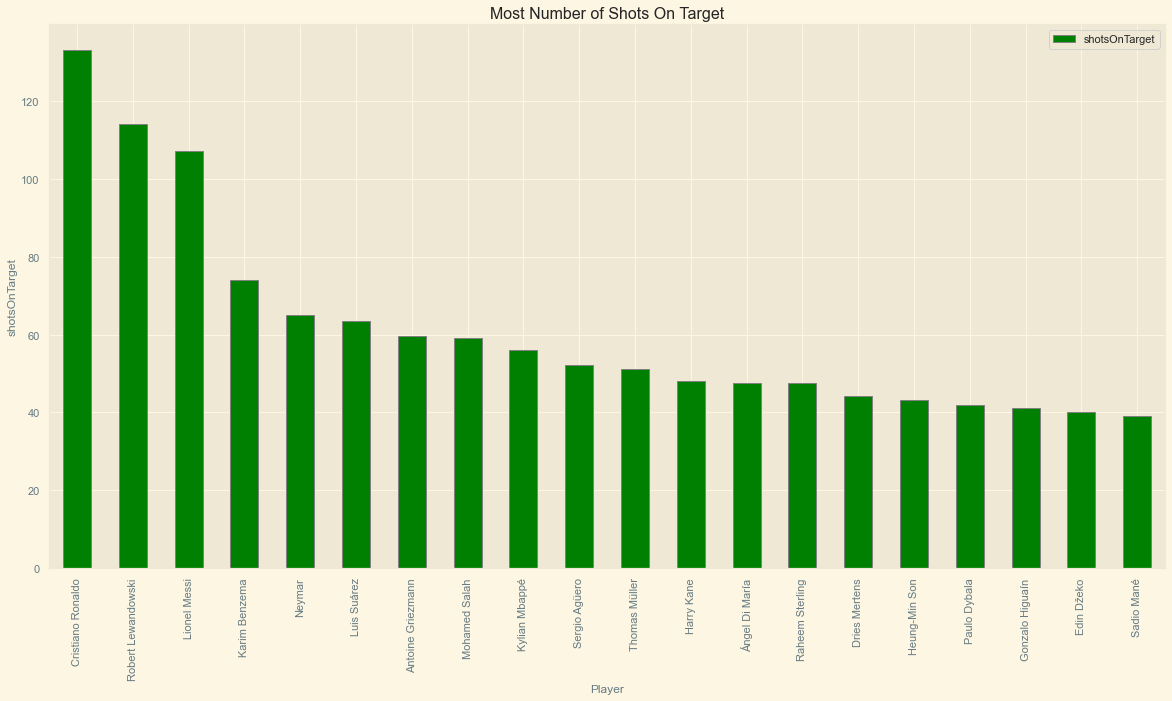

In [41]:
# Most Number of Shots On Target
df_top_20.plot(kind='bar', x= 'name', y = 'shotsOnTarget', color = "green", ec="grey", figsize=(20,10), rot =90, title= "Most Number of Shots On Target")
plt.xlabel('Player')
plt.ylabel('shotsOnTarget')
plt.show()

### Goals

In [42]:
df_unit_v_no = df_champions_league.groupby(['team', 'name'])['goals'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["goals"],axis=0,ascending=[False]).reset_index()
df_top_20_goals = df_sort.head(20)
df_top_20_goals

,index,team,name,goals
0,1392,juventus,Cristiano Ronaldo,80
1,475,bayern-munchen,Robert Lewandowski,59
2,322,barcelona,Lionel Messi,59
3,2239,real-madrid,Karim Benzema,36
4,2112,paris-saint-germain,Neymar,35
5,1774,manchester-city,Sergio Agüero,32
6,1795,manchester-united,Edinson Cavani,30
7,480,bayern-munchen,Thomas Müller,30
8,1610,liverpool,Mohamed Salah,27
9,272,atletico-madrid,Luis Suárez,25


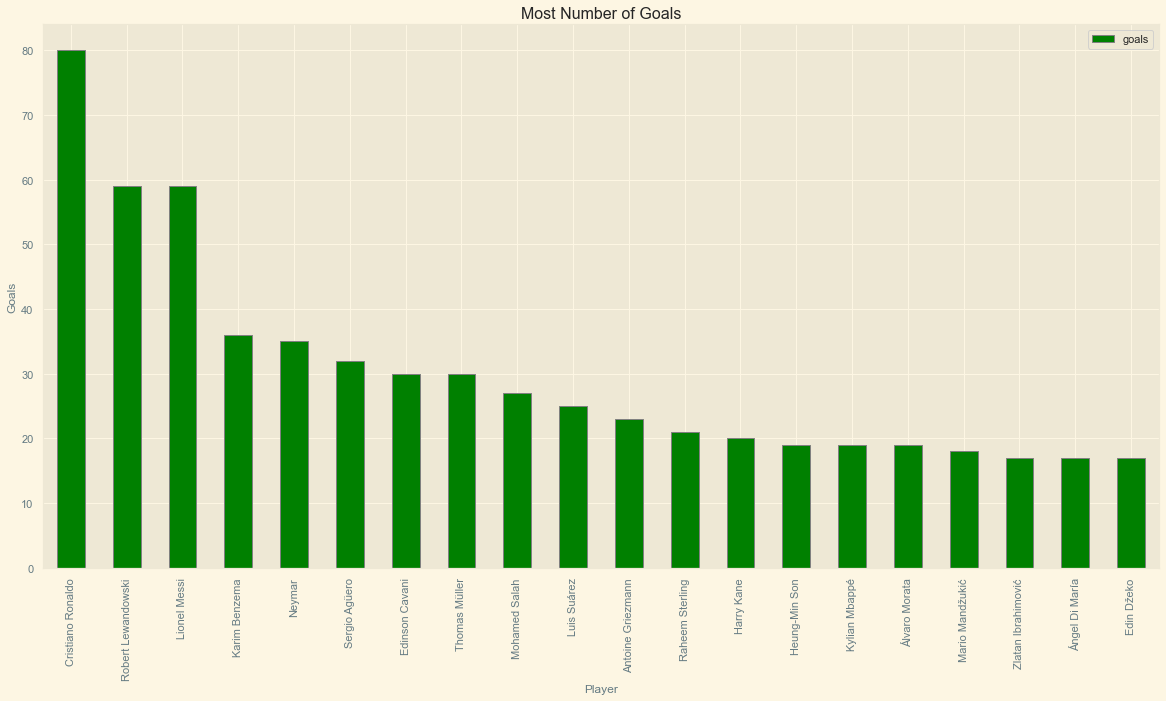

In [43]:
# Most Number of Goals
df_top_20_goals.plot(kind='bar', x= 'name', y = 'goals', color = "green", ec="grey", figsize=(20,10), rot =90, title= "Most Number of Goals")
plt.xlabel('Player')
plt.ylabel('Goals')
plt.show()

### Big Chances Created

In [44]:
df_unit_v_no = df_champions_league.groupby(['team', 'name'])['bigChancesCreated'].sum().reset_index()
df_sort = df_unit_v_no.sort_values(["bigChancesCreated"],axis=0,ascending=[False]).reset_index()
df_top_20_bigChancesCreated = df_sort.head(20)
df_top_20_bigChancesCreated

,index,team,name,bigChancesCreated
0,322,barcelona,Lionel Messi,34.031212
1,2112,paris-saint-germain,Neymar,29.031212
2,2124,paris-saint-germain,Ángel Di María,27.515606
3,1392,juventus,Cristiano Ronaldo,25.031212
4,2102,paris-saint-germain,Kylian Mbappé,25.000000
5,1760,manchester-city,Kevin De Bruyne,20.515606
6,1770,manchester-city,Raheem Sterling,20.515606
7,1610,liverpool,Mohamed Salah,20.031212
8,480,bayern-munchen,Thomas Müller,18.031212
9,479,bayern-munchen,Thiago Alcántara,17.031212


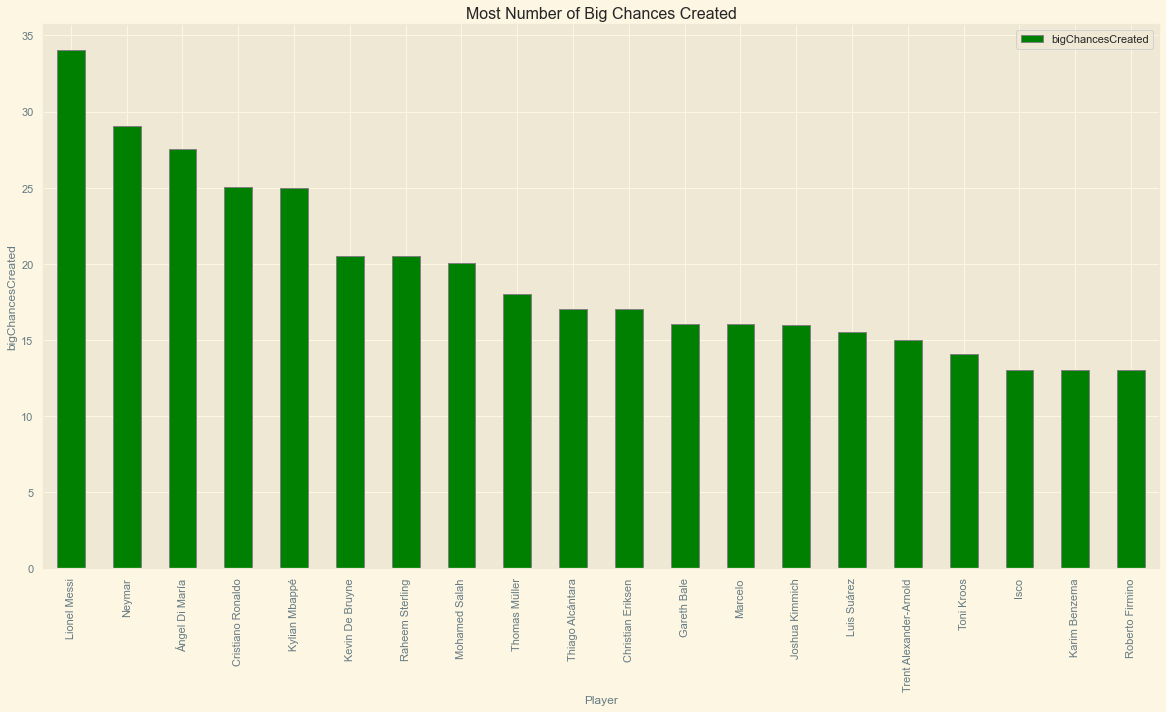

In [45]:
# Most of Big Chances Created
df_top_20_bigChancesCreated.plot(kind='bar', x= 'name', y = 'bigChancesCreated', color = "green", ec="grey", figsize=(20,10), rot =90, title= "Most Number of Big Chances Created")
plt.xlabel('Player')
plt.ylabel('bigChancesCreated')
plt.show()

## Possible Best First Eleven (3-4-3)

In [46]:
# creating a DataFrame
df_first_11_3_4_3 = {'Name' : ['Manuel Neuer', 'Sergio Ramos', 'Mats Hummels', 'Marcelo', 'Joshua Kimmich', 'Toni Kroos', 'Fernandinho', 'Neymar', 'Lionel Messi','Cristiano Ronaldo', 'Robert Lewandowski'],
        'Team' : ["Bayern-Munchen", "Real Madrid", 'Borussia-Dortmund','Real Madrid', 'Bayern-Munchen', 'Real Madrid', 'Manchester City', 'Paris Saint-Germain', 'Barcelona', 'Real Madrid', "Bayern-Munchen"],
        'Position' : ["Goal Keeper", "Defender", "Defender",'Defender' , 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward','Forward'],
        'Key Factor' : ["Saves", "blockedShots", 'Aerial Duels Won', 'Interceptions', 'AccurateCrosses', 'Key Passes', 'Touches', 'AccurateCrosses', 'Big Chances Created', 'Goals', 'Shots On Target'],
        'Score' : [141.125338, 20.993856, 55.000000, 61.601376, 38.000000, 95.547063, 2115.300219, 30.000000, 34.031212, 80, 114.127058],
        
       }
dataframe3 = pd.DataFrame(df_first_11_3_4_3)

  
# displaying the DataFrame
dataframe3
#dataframe3.style.background_gradient()
#dataframe3.style.highlight_max(color = 'lightgreen', axis = 0)


,Name,Team,Position,Key Factor,Score
0,Manuel Neuer,Bayern-Munchen,Goal Keeper,Saves,141.125338
1,Sergio Ramos,Real Madrid,Defender,blockedShots,20.993856
2,Mats Hummels,Borussia-Dortmund,Defender,Aerial Duels Won,55.000000
3,Marcelo,Real Madrid,Defender,Interceptions,61.601376
4,Joshua Kimmich,Bayern-Munchen,Midfielder,AccurateCrosses,38.000000
5,Toni Kroos,Real Madrid,Midfielder,Key Passes,95.547063
6,Fernandinho,Manchester City,Midfielder,Touches,2115.300219
7,Neymar,Paris Saint-Germain,Midfielder,AccurateCrosses,30.000000
8,Lionel Messi,Barcelona,Forward,Big Chances Created,34.031212
9,Cristiano Ronaldo,Real Madrid,Forward,Goals,80.000000


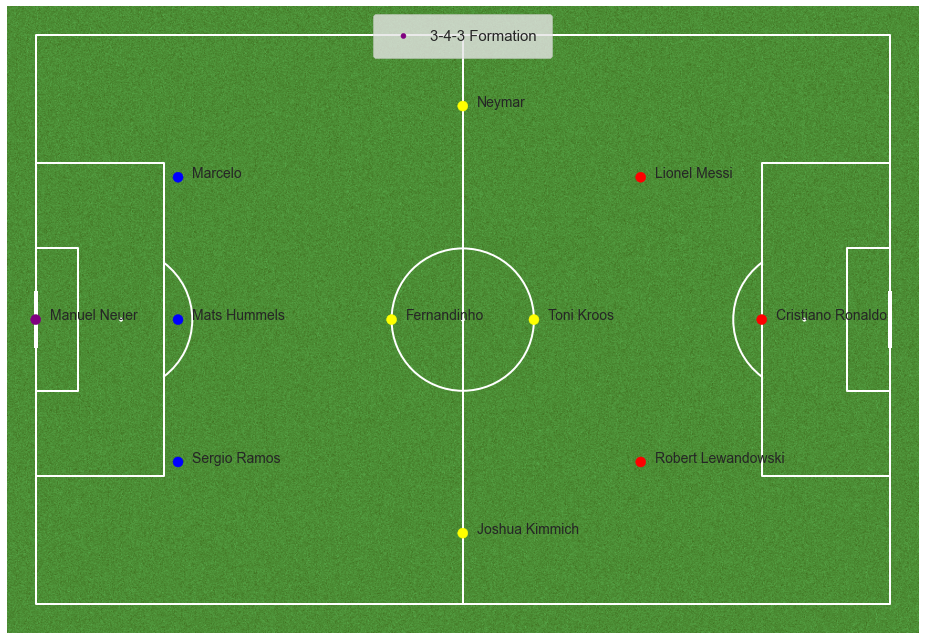

In [47]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# optional stripes
pitch = Pitch( pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(16,9))
sc = pitch.scatter([0,20, 20, 20, 60, 60,50, 70,85,102,85], [40,60, 20, 40, 10, 70,40,40,20,40,60],
                   c=['purple','blue', 'blue', 'blue', 'yellow', 'yellow','yellow','yellow','red','red','red'],
                   s=100, label='3-4-3 Formation', ax=ax )

n = ['Manuel Neuer','Sergio Ramos','Marcelo','Mats Hummels','Neymar','Joshua Kimmich','Fernandinho','Toni Kroos','Lionel Messi', 'Cristiano Ronaldo','Robert Lewandowski'] # Labels for each point

data = sc.get_offsets()

leg = ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper center', fontsize=15)

for idx,label in enumerate(n):
    ax.annotate(label, (data[idx][0]+2, data[idx][1]),fontsize=14)

## Machine Learning - Predict the number of saves for Goalkeeper.

## 1. Label Encoding

In [48]:
pd.set_option('mode.chained_assignment', None)

In [49]:
df_champions_league.head()

,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264,2021,1
2758,Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264,2021,1
562,Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264,2021,1
2767,Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264,2021,1
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264,2021,1


In [50]:
df_champions_league.rename(columns = {'season year':'seasonYear'}, inplace = True)

In [51]:
df_champions_league.head()

,name,season,seasonYear,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
5732,Sabua Leon Rustamovich,UEFA Champions League 20/21,2021-01-20,fc-krasnodar,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264,2021,1
2758,Damien Da Silva,UEFA Champions League 20/21,2021-01-20,stade-rennais,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264,2021,1
562,Ashley Young,UEFA Champions League 20/21,2021-01-20,inter,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264,2021,1
2767,Gergő Lovrencsics,UEFA Champions League 20/21,2021-01-20,ferencvarosi-tc,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264,2021,1
4044,El Arbi Hillel Soudani,UEFA Champions League 20/21,2021-01-20,olympiacos,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264,2021,1


In [52]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder using 'fit_transform'
df_champions_league['name'] = labelencoder.fit_transform(df_champions_league.name)
df_champions_league['season'] = labelencoder.fit_transform(df_champions_league.season)
df_champions_league['team'] = labelencoder.fit_transform(df_champions_league.team)
df_champions_league['seasonYear'] = labelencoder.fit_transform(df_champions_league.seasonYear)
df_champions_league['Year'] = labelencoder.fit_transform(df_champions_league.Year)

# print the first five observations
df_champions_league.head()

,name,season,seasonYear,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
5732,2312,7,7,27,6.400000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,2,0.971264,0.971264,7,1
2758,511,7,7,84,6.766667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,115.0,56.0,0.0,3,0.971264,0.971264,7,1
562,280,7,7,43,6.850000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,32.0,41.0,0.0,2,0.971264,0.971264,7,1
2767,939,7,7,35,6.366667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,71.0,38.0,0.0,3,0.971264,0.971264,7,1
4044,726,7,7,63,6.300000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.971264,0.971264,7,1


## 2. Standardization for Data

In [53]:
# use StandardScaler to normalize the variable
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


from sklearn.preprocessing import StandardScaler

scaled_features = df_champions_league.copy()

In [54]:
#col_names = ['name','season', 'seasonYear','team', 'propertyType', 'district','typeOfArea','marketSegment', 'Year']
#features = scaled_features[col_names]
features = scaled_features
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [55]:

features = scaled_features
#scaled_features[col_names] = features
print(scaled_features)

      name  season  seasonYear  team    rating  goals  bigChancesCreated  \
5732  2312       7           7    27  6.400000      0           0.000000   
2758   511       7           7    84  6.766667      0           0.000000   
562    280       7           7    43  6.850000      0           1.000000   
2767   939       7           7    35  6.366667      0           0.000000   
4044   726       7           7    63  6.300000      0           0.000000   
...    ...     ...         ...   ...       ...    ...                ...   
2420  2493       0           0    19  6.724582      0           0.515606   
2414  1308       0           0    52  6.724582      1           0.515606   
2410  2139       0           0    17  6.724582      1           0.515606   
2408   299       0           0    65  6.724582      0           0.515606   
2866  1401       0           0    70  6.724582      0           0.515606   

      bigChancesMissed   assists  goalsAssistsSum  ...  savesCaught  \
5732           0

In [56]:
df_scaled_data = pd.DataFrame(scaled_features)
df_scaled_data

,name,season,seasonYear,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,...,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut,Year,Month
5732,2312,7,7,27,6.400000,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,4.000000,1.000000,0.000000,2,0.971264,0.971264,7,1
2758,511,7,7,84,6.766667,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,115.000000,56.000000,0.000000,3,0.971264,0.971264,7,1
562,280,7,7,43,6.850000,0,1.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,32.000000,41.000000,0.000000,2,0.971264,0.971264,7,1
2767,939,7,7,35,6.366667,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,71.000000,38.000000,0.000000,3,0.971264,0.971264,7,1
4044,726,7,7,63,6.300000,0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.971264,0.971264,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,2493,0,0,19,6.724582,0,0.515606,0.40231,0.000000,0.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,1,0.000000,0.000000,0,1
2414,1308,0,0,52,6.724582,1,0.515606,0.40231,0.321739,0.81047,...,0.022364,0.267142,73.876137,94.727943,0.397479,6,0.971264,0.971264,0,1
2410,2139,0,0,17,6.724582,1,0.515606,0.40231,0.000000,1.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,9,6.000000,2.000000,0,1
2408,299,0,0,65,6.724582,0,0.515606,0.40231,0.000000,0.00000,...,0.022364,0.267142,73.876137,94.727943,0.397479,3,1.000000,0.000000,0,1


## 3. Feature Importance

In [57]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [58]:
# test regression dataset
from sklearn.datasets import make_regression
# Creating two arrays for the feature and target
X = df_champions_league[['name', 'season', 'team','rating', 'cleanSheet', "penaltySave", 'penaltyFaced', 'savesCaught', 
                  'savesParried', 'Year']]
y = df_champions_league['saves']
# summarize the dataset
print(X.shape, y.shape)

(5733, 10) (5733,)


Feature: 0, Score: -0.00003
Feature: 1, Score: -0.00035
Feature: 2, Score: -0.00048
Feature: 3, Score: -0.03104
Feature: 4, Score: 0.12350
Feature: 5, Score: 2.83525
Feature: 6, Score: 0.73739
Feature: 7, Score: 3.92290
Feature: 8, Score: 2.90014
Feature: 9, Score: -0.00035


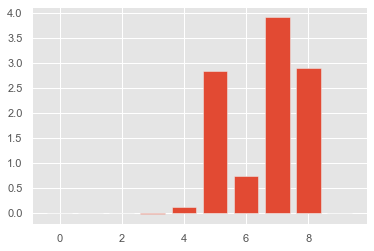

In [59]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = df_champions_league[['name', 'season', 'team','rating', 'cleanSheet', "penaltySave", 'penaltyFaced', 'savesCaught', 
                  'savesParried', 'Year']]
y = df_champions_league['saves']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 4. Create Test and Train dataset - Linear Regression

In [60]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  

In [61]:
### Divide the data into "attributes(Features)"(X) and "labels"(Y)

#X = [row,column]
# X = data.iloc[:, :-1].values
# y = data.iloc[:, 1].values

In [62]:
# Creating two arrays for the feature and target
X = df_champions_league[['name', 'season', 'team','rating', 'cleanSheet', "penaltySave", 'penaltyFaced', 'savesCaught', 
                  'savesParried', 'Year']]
y = df_champions_league['saves']

In [63]:
# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))


The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [64]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state =7)

In [65]:
len(X_test)

4587

## 5. Train a Linear Regression Model on Train Set

In [66]:
# Fitting our model
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Printing coefficients and intercept
print(model.coef_)
print(model.intercept_)


[ 3.50363658e-05 -1.91711252e-03  1.83380173e-04  3.52016985e-03
  6.33957310e-02  4.41202617e-01  8.14413361e-01  4.70770761e+00
  3.15847724e+00 -1.91711252e-03]
-0.03666733935662436


## 6. Visualize the Performance of Model Output

In [68]:
y_predict = model.predict(X_test)

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

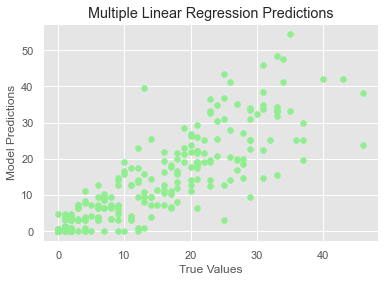

In [69]:
# Visualize the performance of model output of predicted y values against the true y values of test set.
plt.scatter(y_test,y_predict, color ='lightgreen')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression Predictions')

## 7. Model Evaluation

### Compute the performance on test set using metrics r2_score, RMSE, MAE.

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1] # store no. of features as k
n = len(X_test) # store no. of rows as n

In [71]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

MAE = mean_absolute_error(y_test, y_predict)

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   

print('Root Mean Squared Error =',RMSE, '\nMean Absolute Error =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


Root Mean Squared Error = 1.545 
Mean Absolute Error = 0.3095453887054497 
R2 = 0.8594530464430535 
Adjusted R2 = 0.8591459071214693


### Collect the coefficients and store them into dataframe.

In [72]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
cdf

,Coefficients
name,0.000035
season,-0.001917
team,0.000183
rating,0.003520
cleanSheet,0.063396
penaltySave,0.441203
penaltyFaced,0.814413
savesCaught,4.707708
savesParried,3.158477
Year,-0.001917


In [73]:
intercept = model.intercept_
intercept

-0.03666733935662436

### Testing The Model 

In [74]:
# test the model on the test data, store the prediction results to y_pred
y_pred = model.predict(X_test)

## 8. Regularization

In [75]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics

#from mlxtend.math import num_combinations

In [76]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state =7)

### Linear Regression

In [77]:
# Fit the linear regression model to train set

model_LR = LinearRegression()
model_LR.fit(X_train , y_train)

LinearRegression()

In [78]:
# predict on test set using X_test to get predicted y values

LR_y = model_LR.predict(X_test)

In [79]:
# MAE of Y_test (actual y) against predicted y

metrics.mean_absolute_error(y_test , LR_y)

0.3095453887054497

In [80]:
# R2 score
metrics.r2_score(y_test , LR_y)*100

85.94530464430535

### Lasso

In [81]:
model_Lasso = Lasso(alpha= 0.7 )

In [82]:
model_Lasso.fit(X_train , y_train)

Lasso(alpha=0.7)

In [83]:
Lasso_y = model_Lasso.predict(X_test)

In [84]:
metrics.mean_absolute_error(y_test , Lasso_y)

0.4793588079395296

In [85]:
metrics.r2_score(y_test , Lasso_y)*100

81.33732855441389

### Ridge

In [86]:
model_Ridge = Ridge(alpha= 0.3)

In [87]:
model_Ridge.fit(X_train , y_train)

Ridge(alpha=0.3)

In [88]:
Ridge_y = model_Ridge.predict(X_test)

In [89]:
metrics.mean_absolute_error(y_test , Ridge_y)

0.3094276903388937

In [90]:
metrics.r2_score(y_test , Ridge_y)*100

86.00006534531897

### Elastic

In [91]:
model_Elas = ElasticNet(alpha= 0.2 , l1_ratio= 0.4)

In [92]:
model_Elas.fit(X_train , y_train)

ElasticNet(alpha=0.2, l1_ratio=0.4)

In [93]:
Elas_y = model_Elas.predict(X_test)

In [94]:
metrics.mean_absolute_error(y_test , Elas_y)

0.4120281166530665

In [95]:
metrics.r2_score(y_test , Elas_y)*100

83.10562289982576

In [96]:
# .coef_ is an attribute of a model_Ridge object

model_Ridge.coef_


array([ 3.49131519e-05, -2.14108223e-03,  1.94028381e-04,  3.27748839e-03,
        6.43835231e-02,  4.56390223e-01,  8.03829994e-01,  4.54933589e+00,
        3.16297859e+00, -2.14108223e-03])

In [97]:
coef = model_Ridge.coef_

# Store coefficients and their names in dataframe
pd.DataFrame([coef], columns = X.columns)

,name,season,team,rating,cleanSheet,penaltySave,penaltyFaced,savesCaught,savesParried,Year
0,0.000035,-0.002141,0.000194,0.003277,0.064384,0.45639,0.80383,4.549336,3.162979,-0.002141


In [98]:
# creating a DataFrame
dict_regularization = {'Regularization' : ['Mean Absolute Error (MAE) ', 'R2 Score'],
        'Linear Regression' : ["0.3095453887054497", "85.94530464430535"],
        'Lasso' : ["0.4793588079395296", "81.33732855441389"],
        'Ridge' : ["0.3094276903388937", "86.00006534531897"],
        'Elastic' : ["0.4120281166530665", "83.10562289982576"],
        
       }
dataframe3 = pd.DataFrame(dict_regularization)

  
# displaying the DataFrame
dataframe3
dataframe3.style.background_gradient()

#dataframe1.style.highlight_max(color = 'lightgreen', axis = 0)
#print(tabulate(dataframe1, headers = 'keys', tablefmt = 'pretty'))

,Regularization,Linear Regression,Lasso,Ridge,Elastic
0,Mean Absolute Error (MAE),0.3095453887054497,0.4793588079395296,0.3094276903388937,0.4120281166530665
1,R2 Score,85.94530464430535,81.33732855441389,86.00006534531897,83.10562289982576


## 9. Forward Selection

In [99]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [100]:
sfs = SFS(model_Elas, 
          k_features=3, 
          forward=True, 
          scoring='r2',   # default is r2 (reg) and accuracy (classf)
          cv=3)

In [101]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [102]:
sfs = sfs.fit(X_train, y_train)

In [103]:
sfs.k_feature_names_

('cleanSheet', 'penaltyFaced', 'savesParried')

In [104]:
print('\nSelected feature indices:', sfs.k_feature_idx_)
print('CV Score:', sfs.k_score_)


Selected feature indices: (4, 6, 8)
CV Score: 0.8688840803544183


In [105]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.9243118691572886, 0.8214913754827855, 0.856...",0.86749,"(savesParried,)",0.0960178,0.0426683,0.0301711
2,"(6, 8)","[0.9253856883102191, 0.8232713611466533, 0.856...",0.868515,"(penaltyFaced, savesParried)",0.0956187,0.042491,0.0300456
3,"(4, 6, 8)","[0.9265089037975852, 0.8245563227055627, 0.855...",0.868884,"(cleanSheet, penaltyFaced, savesParried)",0.0960233,0.0426708,0.0301728


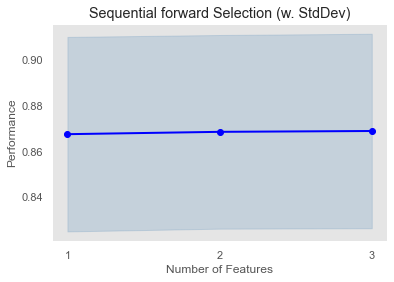

In [106]:
# Plot graph showing the selection results 

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

#plt.ylim([0, 0.2])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

## 10. AutoML - Pycaret

In [107]:
# Most number of Goals as label
import scikitplot as skplt
df_champions_league.shape

(5733, 110)

In [108]:
data = df_champions_league.sample(frac=0.9, random_state=786)
data_unseen = df_champions_league.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5160, 110)
Unseen Data For Predictions: (573, 110)


In [109]:
from pycaret.regression import *
exp_reg101 = setup(data = df_champions_league, target = 'saves', session_id=123, fold_shuffle=True)

,Description,Value
0,session_id,123
1,Target,saves
2,Original Data,"(5733, 110)"
3,Missing Values,False
4,Numeric Features,104
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4013, 139)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0230,0.0085,0.0861,0.9995,0.0202,0.0097,0.5220
ridge,Ridge Regression,0.0230,0.0085,0.0859,0.9995,0.0202,0.0097,0.0250
omp,Orthogonal Matching Pursuit,0.0180,0.0081,0.0832,0.9995,0.0160,0.0050,0.0260
br,Bayesian Ridge,0.0230,0.0085,0.0860,0.9995,0.0202,0.0097,0.0330
gbr,Gradient Boosting Regressor,0.0412,0.0831,0.2543,0.9953,0.0181,0.0116,0.3520
et,Extra Trees Regressor,0.0484,0.1203,0.3099,0.9933,0.0253,0.0140,0.2040
xgboost,Extreme Gradient Boosting,0.0514,0.1254,0.3213,0.9926,0.0263,0.0138,0.3420
catboost,CatBoost Regressor,0.0591,0.1386,0.3292,0.9924,0.0276,0.0149,2.4220
rf,Random Forest Regressor,0.0578,0.1625,0.3687,0.9903,0.0283,0.0152,0.2740
lightgbm,Light Gradient Boosting Machine,0.0631,0.1950,0.3914,0.9891,0.0312,0.0155,0.1380


### Linear Regression

In [ ]:
# create a model
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0233,0.0062,0.0787,0.9997,0.0181,0.0078
1,0.0295,0.0147,0.1212,0.9994,0.0222,0.0101
2,0.0226,0.0038,0.0620,0.9998,0.0188,0.0099
3,0.0225,0.0039,0.0626,0.9998,0.0182,0.0091
4,0.0179,0.0030,0.0547,0.9995,0.0178,0.0092
5,0.0203,0.0047,0.0686,0.9995,0.0165,0.0082
6,0.0244,0.0143,0.1197,0.9986,0.0174,0.0084
7,0.0236,0.0069,0.0834,0.9995,0.0177,0.0092
8,0.0191,0.0027,0.0524,0.9998,0.0172,0.0100
9,0.0272,0.0248,0.1574,0.9990,0.0385,0.0151


In [ ]:
# predict on hold-out
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0245,0.0109,0.1042,0.9994,0.0179,0.0101


,name,season,team,rating,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,...,appearances_4,appearances_5,appearances_6,appearances_7,appearances_8,appearances_9,Year_7,Month_1,saves,Label
0,1316,0,58,6.724582,0.515606,0.40231,0.0,0.0,135.311874,27.785942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.062669,1.052461
1,478,1,85,6.724582,0.515606,0.40231,0.0,0.0,135.311874,27.785942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.062669,1.051445
2,2372,1,39,6.724582,0.515606,0.40231,0.0,0.0,135.311874,27.785942,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.062669,1.063913
3,684,1,55,6.724582,0.515606,0.40231,0.0,0.0,135.311874,27.785942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.062669,1.063508
4,2340,2,4,7.140000,1.000000,2.00000,1.0,1.0,293.000000,38.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,-0.010704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,840,2,60,7.066667,1.000000,2.00000,1.0,2.0,29.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.025044
1716,1763,6,44,7.066667,0.000000,0.00000,0.0,0.0,359.000000,34.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.011964
1717,895,4,9,7.000000,1.000000,0.00000,0.0,0.0,287.000000,37.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,-0.016496
1718,2056,6,79,6.500000,1.000000,1.00000,0.0,0.0,263.000000,39.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.013540
